# feature extraction

In [1]:
corpus = [
    'Saya mau beli apa hari ini?',
    'aku ingin makan nasi goreng.',
    'aku suka, makan nasi goreng',
    'data yang saya :proeses adalah data teks',
    'NLP adalah cabang =besar dalam data science',
]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [3]:
vect = CountVectorizer()
vect.fit(corpus)

CountVectorizer()

In [4]:
vect.get_feature_names_out()

array(['adalah', 'aku', 'apa', 'beli', 'besar', 'cabang', 'dalam', 'data',
       'goreng', 'hari', 'ingin', 'ini', 'makan', 'mau', 'nasi', 'nlp',
       'proeses', 'saya', 'science', 'suka', 'teks', 'yang'], dtype=object)

In [5]:
corpus_vect = vect.transform(corpus)
print(corpus_vect)

  (0, 2)	1
  (0, 3)	1
  (0, 9)	1
  (0, 11)	1
  (0, 13)	1
  (0, 17)	1
  (1, 1)	1
  (1, 8)	1
  (1, 10)	1
  (1, 12)	1
  (1, 14)	1
  (2, 1)	1
  (2, 8)	1
  (2, 12)	1
  (2, 14)	1
  (2, 19)	1
  (3, 0)	1
  (3, 7)	2
  (3, 16)	1
  (3, 17)	1
  (3, 20)	1
  (3, 21)	1
  (4, 0)	1
  (4, 4)	1
  (4, 5)	1
  (4, 6)	1
  (4, 7)	1
  (4, 15)	1
  (4, 18)	1


In [6]:
corpus_vect.toarray()

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]],
      dtype=int64)

In [7]:
pd.DataFrame(corpus_vect.toarray(), columns=vect.get_feature_names_out())

,adalah,aku,apa,beli,besar,cabang,dalam,data,goreng,hari,...,makan,mau,nasi,nlp,proeses,saya,science,suka,teks,yang
0,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,1,0,0,1,1
4,1,0,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [8]:
print(corpus)

['Saya mau beli apa hari ini?', 'aku ingin makan nasi goreng.', 'aku suka, makan nasi goreng', 'data yang saya :proeses adalah data teks', 'NLP adalah cabang =besar dalam data science']


## Pemodelan machine learning

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [12]:
df = pd.read_csv('data/dataset_sms_spam _v1.csv')

In [13]:
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [14]:
df[df['label']==2]

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2
...,...,...
234,"Yuk INTERNET-an NGEBUT utk akses FB, Twitter, ...",2
235,"Yuk temen belanja di google play, mudah banget...",2
236,Yuk tetap gunakan Flash Volume Ultima utk upda...,2
237,Mau nonton bioskop gratis bersama keluarga? Ci...,2


In [15]:
df.replace({'label': {0:'sms biasa',1:'sms penipuan',2:'sms operator'}}, inplace=True)

In [16]:
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,sms operator
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,sms operator
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",sms operator
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",sms operator
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,sms operator


In [17]:
df.shape

(1143, 2)

<AxesSubplot:>

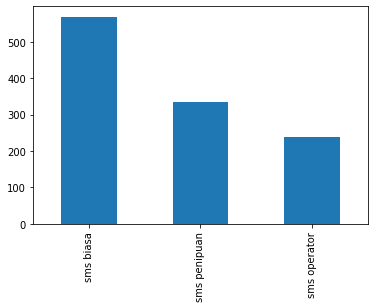

In [18]:
import matplotlib.pyplot as plt

df.label.value_counts().plot(kind='bar')

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df['Teks'], df['label'], test_size=0.15, random_state=46, stratify=df['label'])

In [20]:
stp = StopWordRemoverFactory().get_stop_words()


In [21]:
# vektorisasi
vect = CountVectorizer(stop_words=stp)

# fitting
x_train_vec = vect.fit_transform(x_train)
x_test_vec = vect.transform(x_test)

In [22]:
x_train_vec

<971x4432 sparse matrix of type '<class 'numpy.int64'>'
	with 14192 stored elements in Compressed Sparse Row format>

In [23]:
x_test_vec

<172x4432 sparse matrix of type '<class 'numpy.int64'>'
	with 2046 stored elements in Compressed Sparse Row format>

In [24]:
# modeling
model = MultinomialNB()
model.fit(x_train_vec, y_train)


MultinomialNB()

In [25]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy')
model_rf.fit(x_train_vec, y_train)

RandomForestClassifier(criterion='entropy')

In [26]:
# evaluasi
y_pred = model.predict(x_test_vec)
y_pred_rf = model_rf.predict(x_test_vec)

In [27]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

   sms biasa       1.00      0.93      0.96        86
sms operator       0.84      1.00      0.91        36
sms penipuan       0.96      0.94      0.95        50

    accuracy                           0.95       172
   macro avg       0.93      0.96      0.94       172
weighted avg       0.95      0.95      0.95       172

              precision    recall  f1-score   support

   sms biasa       0.93      0.94      0.94        86
sms operator       0.84      0.89      0.86        36
sms penipuan       0.94      0.88      0.91        50

    accuracy                           0.91       172
   macro avg       0.90      0.90      0.90       172
weighted avg       0.91      0.91      0.91       172



In [28]:
sms_baru = ["selamat ulang taun han, semoga panjang umur"]
sms_baru_vect = vect.transform(sms_baru)
res = model.predict(sms_baru_vect)
print(res)

['sms biasa']


In [29]:
res2 = model.predict_proba(sms_baru_vect)

In [30]:
import numpy as np
print(np.max(res2))
print(np.argmax(res2))

0.7407755908558674
0


## Kelas siang

# model deep learning

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [117]:
df = pd.read_csv('data/dataset_sms_spam _v1.csv')
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [118]:
train_df, test_df = train_test_split(df, test_size=0.15, random_state=46, stratify=df['label'])
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=46, stratify=train_df['label'])

In [119]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(873, 2)
(98, 2)
(172, 2)


In [120]:
train_df.sample(5)

,Teks,label
42,Buktikan hematnya pakai argo tetap di Bandung ...,2
114,Lebih hemat langganan paket Internet MINGGUAN ...,2
174,"Plg yth,Mohon memberikan nilai kepuasan pengal...",2
129,Mau paket data 1.5GB buat SEBULAN Cuma 20ribua...,2
866,Kalo udah ad progres besok aja jam 2an kesini..,0


In [121]:
from tensorflow.keras.utils import to_categorical

x_train, y_train = train_df['Teks'], train_df['label']
x_val, y_val = val_df['Teks'], val_df['label']
x_test, y_test = test_df['Teks'], test_df['label']

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)


In [122]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [123]:
round(sum([len(i.split()) for i in x_train])/len(x_train))

17

In [124]:
max_vocab_length = 3500
max_length = 17

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                        standardize="lower_and_strip_punctuation",
                                        split="whitespace",
                                        ngrams=None,
                                        output_mode="int",
                                        output_sequence_length=max_length,
                                        input_shape=(1,))


In [125]:
text_vectorization.adapt(x_train)

In [126]:
# sms baru
sms_baru = ["selamat anda mendapatkan undian berhadiah mobil"]
text_vectorization([sms_baru])

<tf.Tensor: shape=(1, 17), dtype=int64, numpy=
array([[33,  3, 85, 88,  1, 71,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0]], dtype=int64)>

In [127]:
# embedding layer

from tensorflow.keras.layers import Embedding

embedding = Embedding(input_dim=max_vocab_length,
                        output_dim=128,
                        embeddings_initializer="uniform",
                        input_length=max_length,
                        )

In [128]:
sms_baru = ["selamat anda mendapatkan undian berhadiah mobil"]
emb_res = (embedding(text_vectorization([sms_baru])))
emb_res[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.01997879,  0.00415457, -0.00488695,  0.01011198,  0.03096971,
        0.04302377, -0.02977818,  0.01640861,  0.04311205, -0.02525045,
       -0.01386625,  0.00140053,  0.00501411, -0.02368467,  0.03507564,
       -0.04088489, -0.04555131, -0.04438898,  0.0235468 ,  0.02788803,
       -0.01240102,  0.04862436, -0.04493449, -0.03464118, -0.00800793,
        0.01923044,  0.0413064 , -0.02799189,  0.04892529,  0.00303364,
       -0.01074654, -0.02064862,  0.03637559,  0.01357892,  0.02778946,
        0.00627363, -0.03798189, -0.04553924,  0.03867967, -0.01449909,
        0.03189648,  0.03129164, -0.04697654, -0.04983811, -0.04795078,
       -0.01748908,  0.02438399, -0.00177912, -0.01903019, -0.04632026,
        0.02974002, -0.01908355,  0.04893347,  0.01356775, -0.04339299,
       -0.03917925,  0.03655717, -0.04380441,  0.04945334, -0.00982074,
       -0.02026709,  0.00340364, -0.01474873, -0.01660464, -0.01581382,
        0.033384

In [129]:
# fully connected layer

from tensorflow.keras.layers import Dense, Dropout, Activation, GlobalAvgPool1D, Flatten, Input
from tensorflow.keras.models import Model, Sequential

In [145]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAvgPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# inputs = Input(shape=(1,), dtype='string')
# layer1 = text_vectorization(inputs)
# layer2 = embedding(layer1)
# layer3 = GlobalAvgPool1D()(layer2)
# layer4 = Dense(32, activation='relu')(layer3)
# out = Dense(3, activation='softmax')(layer4)
# model = Model(inputs=inputs, outputs=out)

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [146]:
model_1_history = model.fit(x_train, y_train_ohe, epochs=50,validation_data=(x_val, y_val_ohe))

Epoch 1/50
28/28 [==============================] - 1s 17ms/step - loss: 0.7492 - accuracy: 0.7915 - val_loss: 0.4623 - val_accuracy: 0.8673
Epoch 2/50
28/28 [==============================] - 0s 16ms/step - loss: 0.2794 - accuracy: 0.9885 - val_loss: 0.2655 - val_accuracy: 0.9184
Epoch 3/50
28/28 [==============================] - 0s 12ms/step - loss: 0.1133 - accuracy: 0.9966 - val_loss: 0.2259 - val_accuracy: 0.9082
Epoch 4/50
28/28 [==============================] - 1s 24ms/step - loss: 0.0578 - accuracy: 0.9977 - val_loss: 0.2178 - val_accuracy: 0.9082
Epoch 5/50
28/28 [==============================] - 1s 18ms/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.2251 - val_accuracy: 0.9082
Epoch 6/50
28/28 [==============================] - 0s 15ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.2323 - val_accuracy: 0.9082
Epoch 7/50
28/28 [==============================] - 0s 13ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.2408 - val_accuracy: 0.9184
Epoch 8/50
28

<AxesSubplot:>

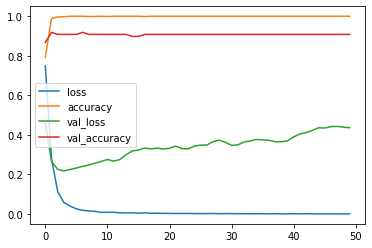

In [147]:
metrics = pd.DataFrame(model_1_history.history)
metrics.plot()

In [150]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        86
           1       0.87      0.96      0.91        50
           2       0.91      0.89      0.90        36

    accuracy                           0.93       172
   macro avg       0.92      0.93      0.92       172
weighted avg       0.93      0.93      0.93       172



In [154]:
# sms_baru = ["selamat anda mendapatkan undian berhadiah mobil",
#             "pesugihan halal, lunasi hutang anda,",
#             "selamat ulang taun han, semoga panjang umur"]

# hasil = model.predict([sms_baru])
# hasil.argmax(axis=1)



In [163]:
from tensorflow.keras.layers import LSTM

model_2 = Sequential()
model_2.add(text_vectorization)
model_2.add(embedding)
model_2.add(Dropout(0.4))
model_2.add(LSTM(2))
model_2.add(Dropout(0.4))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(3, activation='softmax'))


model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_2_history = model_2.fit(x_train, y_train_ohe, epochs=50,validation_data=(x_val, y_val_ohe))

Epoch 1/50
28/28 [==============================] - 4s 43ms/step - loss: 1.0065 - accuracy: 0.6289 - val_loss: 0.9547 - val_accuracy: 0.6735
Epoch 2/50
28/28 [==============================] - 1s 34ms/step - loss: 0.8365 - accuracy: 0.7675 - val_loss: 0.8400 - val_accuracy: 0.8163
Epoch 3/50
28/28 [==============================] - 1s 22ms/step - loss: 0.6797 - accuracy: 0.8328 - val_loss: 0.7686 - val_accuracy: 0.8469
Epoch 4/50
28/28 [==============================] - 1s 26ms/step - loss: 0.5975 - accuracy: 0.8121 - val_loss: 0.6562 - val_accuracy: 0.8469
Epoch 5/50
28/28 [==============================] - 1s 31ms/step - loss: 0.5207 - accuracy: 0.8053 - val_loss: 0.5858 - val_accuracy: 0.8776
Epoch 6/50
28/28 [==============================] - 1s 32ms/step - loss: 0.4809 - accuracy: 0.8282 - val_loss: 0.4883 - val_accuracy: 0.9184
Epoch 7/50
28/28 [==============================] - 1s 46ms/step - loss: 0.4290 - accuracy: 0.8522 - val_loss: 0.4465 - val_accuracy: 0.9286
Epoch 8/50
28

<AxesSubplot:>

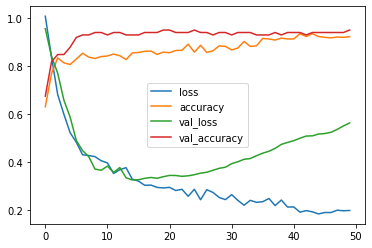

In [165]:
metrics2 = pd.DataFrame(model_2_history.history)
metrics2.plot()

In [166]:
y_pred2 = model_2.predict(x_test)
y_pred2 = np.argmax(y_pred2, axis=1)
print(classification_report(y_test, y_pred2))

6/6 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        86
           1       0.94      0.88      0.91        50
           2       0.91      0.89      0.90        36

    accuracy                           0.91       172
   macro avg       0.91      0.90      0.91       172
weighted avg       0.91      0.91      0.91       172



In [178]:
from tensorflow.keras.layers import GRU

model_3 = Sequential()
model_3.add(text_vectorization)
model_3.add(embedding)
model_3.add(Dropout(0.4))
model_3.add(GRU(2))
model_3.add(Dropout(0.3))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(3, activation='softmax'))


model_3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_3_history = model_3.fit(x_train, y_train_ohe, epochs=50,validation_data=(x_val, y_val_ohe))

Epoch 1/50
28/28 [==============================] - 3s 40ms/step - loss: 1.0613 - accuracy: 0.5029 - val_loss: 1.0439 - val_accuracy: 0.5000
Epoch 2/50
28/28 [==============================] - 1s 18ms/step - loss: 1.0349 - accuracy: 0.5395 - val_loss: 1.0226 - val_accuracy: 0.5408
Epoch 3/50
28/28 [==============================] - 0s 15ms/step - loss: 1.0192 - accuracy: 0.5682 - val_loss: 1.0007 - val_accuracy: 0.6837
Epoch 4/50
28/28 [==============================] - 0s 13ms/step - loss: 0.9946 - accuracy: 0.5979 - val_loss: 0.9782 - val_accuracy: 0.6939
Epoch 5/50
28/28 [==============================] - 0s 16ms/step - loss: 0.9731 - accuracy: 0.6186 - val_loss: 0.9549 - val_accuracy: 0.6939
Epoch 6/50
28/28 [==============================] - 0s 15ms/step - loss: 0.9505 - accuracy: 0.6598 - val_loss: 0.9323 - val_accuracy: 0.6939
Epoch 7/50
28/28 [==============================] - 1s 18ms/step - loss: 0.9251 - accuracy: 0.6747 - val_loss: 0.9102 - val_accuracy: 0.6939
Epoch 8/50
28

<AxesSubplot:>

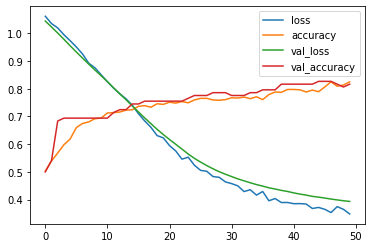

In [181]:
metrics3 = pd.DataFrame(model_3_history.history)
metrics3.plot()

In [182]:
y_pred3 = model_3.predict(x_test)
y_pred3 = np.argmax(y_pred3, axis=1)
print(classification_report(y_test, y_pred3))

6/6 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        86
           1       0.69      0.90      0.78        50
           2       0.72      0.36      0.48        36

    accuracy                           0.79       172
   macro avg       0.76      0.72      0.72       172
weighted avg       0.79      0.79      0.77       172

